In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 14.5MB/s]


In [5]:
!unzip /content/pima-indians-diabetes-database.zip

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [1]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = df.drop("Outcome", axis=1)
y = df['Outcome']

In [3]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(614, 8)

In [7]:
X_test.shape

(154, 8)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2

model=Sequential()

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-7)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=16, callbacks=[reduce_lr])
history

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6687 - loss: 1.5828 - val_accuracy: 0.3571 - val_loss: 2.8336 - learning_rate: 0.0010
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7142 - loss: 1.4698 - val_accuracy: 0.3766 - val_loss: 2.1906 - learning_rate: 0.0010
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7367 - loss: 1.3547 - val_accuracy: 0.5260 - val_loss: 1.8401 - learning_rate: 0.0010
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7298 - loss: 1.3425 - val_accuracy: 0.6948 - val_loss: 1.5615 - learning_rate: 0.0010
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7842 - loss: 1.3267 - val_accuracy: 0.6299 - val_loss: 1.4542 - learning_rate: 0.0010
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7397 - loss: 1.3139 - val_accuracy: 0.7013 - val_loss: 1.3688 - learning_rate: 0.0010
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7753 - loss: 1.2332 - 

In [10]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8215 - loss: 0.9378
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7337 - loss: 1.1125 


In [11]:
print(train_loss)
print(test_loss)
print(train_acc*100)
print(test_acc*100)

0.9251126646995544
1.147942304611206
82.73615837097168
74.02597665786743


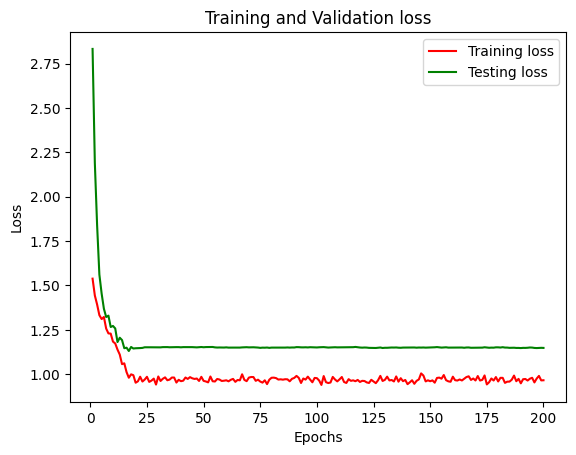

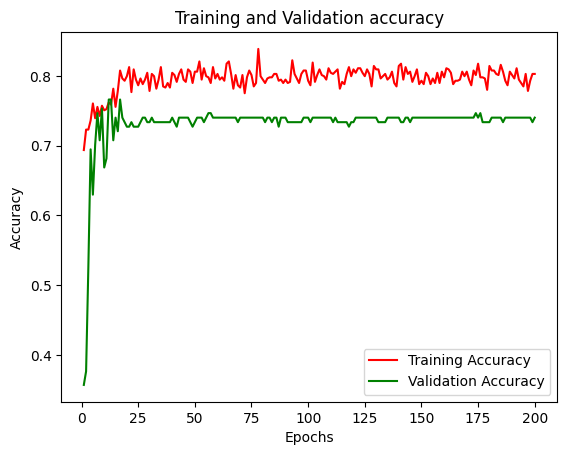

In [12]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Testing loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
import numpy as np
predictions=model.predict(X_test)

binary_pred = (predictions>0.5).astype(int)

result_df=pd.DataFrame({
    'True Labels':y_test.values.flatten(),
    'Predicted Labels':binary_pred.flatten()
})

result_df['Correct Prediction'] = np.where(result_df['True Labels']==result_df['Predicted Labels'], 'Yes', 'No')

print(result_df)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
     True Labels  Predicted Labels Correct Prediction
0              0                 1                 No
1              0                 0                Yes
2              0                 0                Yes
3              0                 0                Yes
4              0                 0                Yes
..           ...               ...                ...
149            1                 1                Yes
150            0                 0                Yes
151            0                 0                Yes
152            1                 0                 No
153            0                 0                Yes

[154 rows x 3 columns]


# Using Stratified K-Fold

In [19]:
from sklearn.model_selection import StratifiedKFold

seed = 7

np.random.seed(seed)

dataset=np.genfromtxt('/content/diabetes.csv', delimiter=',', skip_header=1)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores=[]

In [23]:
for train, test in kfold.split(X, y):
  model=Sequential()
  model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(BatchNormalization())
  model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(BatchNormalization())
  model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(BatchNormalization())

  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-7)

  history1=model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[reduce_lr], verbose=0)

  scores = model.evaluate(X.iloc[test], y.iloc[test])

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  cvscores.append(scores[1] * 100)

3/3 [==============================] - 0s 8ms/step - loss: 0.9809 - accuracy: 0.8052
accuracy: 80.52%
3/3 [==============================] - 0s 6ms/step - loss: 1.0636 - accuracy: 0.8052
accuracy: 80.52%
3/3 [==============================] - 0s 8ms/step - loss: 1.0246 - accuracy: 0.7922
accuracy: 79.22%
3/3 [==============================] - 0s 6ms/step - loss: 0.9056 - accuracy: 0.8961
accuracy: 89.61%
3/3 [==============================] - 0s 5ms/step - loss: 1.0897 - accuracy: 0.7922
accuracy: 79.22%
3/3 [==============================] - 0s 6ms/step - loss: 1.1663 - accuracy: 0.8052
accuracy: 80.52%
3/3 [==============================] - 0s 7ms/step - loss: 0.9046 - accuracy: 0.8571
accuracy: 85.71%
3/3 [==============================] - 0s 7ms/step - loss: 1.0275 - accuracy: 0.8182
accuracy: 81.82%
3/3 [==============================] - 0s 8ms/step - loss: 1.0292 - accuracy: 0.7895
accuracy: 78.95%
3/3 [==============================] - 0s 6ms/step - loss: 0.9349 - accuracy: 0.82

In [24]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

81.90% (+/- 3.22%)


# Using Grid Search CV

In [13]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [15]:
from keras.layers import Wrapper
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
import numpy as np
seed=7
np.random.seed(seed)

dataset=np.genfromtxt("/content/diabetes.csv", delimiter=",", skip_header=1)

In [17]:
def create_model(optimizer="adam", init="glorot_uniform"):
  model=Sequential()
  model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
  model.add(BatchNormalization())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

  return model


In [18]:
model = KerasClassifier(model=create_model, verbose=0)

optimizers=["adam", "rmsprop"]
epochs=[50, 100]
batches=[5, 10]

param_grid=dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid=GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [19]:
print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best : 0.763093 using {'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}
